# 911 Calls Capstone Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


This tell us there's almost 100000 entries and there's nine total columns.

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


We use the .head() function for a better visualization of the dataframe. 

The title column has some sort of label immerse of fire colon and the actual title event.
Then we have a timestamp, twp which is township, and if we scroll over to the right, we have an address and finally a dummy call.

## Basic Questions

What are the top 5 zipcodes for 911 calls?

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique title codes are there?

In [9]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We can use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.


In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

What is the most common Reason for a 911 call based off of this new column?

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Now let's use seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

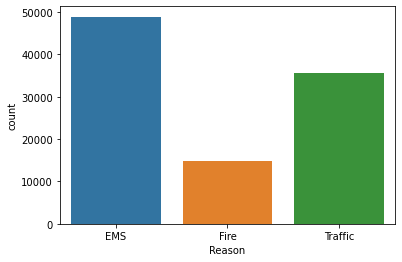

In [12]:
sns.countplot(x='Reason', data=df)

Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [13]:
type(df['timeStamp'].iloc[0])

str

We want to turn these timestamps into datetime objects. We can use pd.to_datetime() to convert the column from strings to DateTime objects.

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

You can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

We will check out the head of our dataframe to confirm that this all worked.

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


If we scroll all the way to the right, notice we have three new columns.

Notice how the Day of Week is an integer 0-6. We are gonna use the .map() with a dictionary to map the actual string names to the day of the week.

In [17]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [18]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Now if you check out the dataframe again, notice the day of the week column will be actually strings... Thursday, Friday, etc...

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


We are going to use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

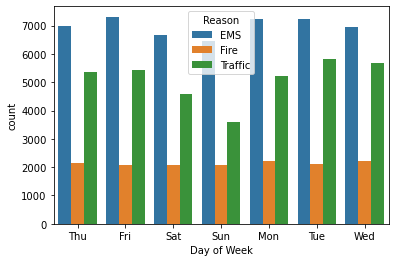

In [20]:
sns.countplot(x='Day of Week', hue='Reason', data=df)

The same for Month column.

<AxesSubplot:xlabel='Month', ylabel='count'>

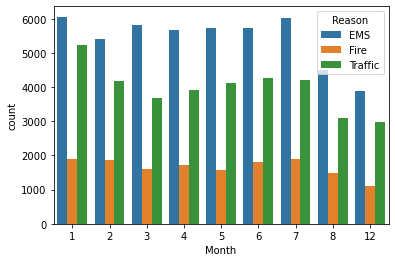

In [21]:
sns.countplot(x='Month', hue='Reason', data=df)

There are missing some months. It goes one through eight, but then doesn't have months 9, 10 and 11.

What we want to do now is work with pandas to try to create some sort of visualization that tries to take that into account, so we can fill in those missing data points.

We're going to create a groupby() object called byMonth, and use count() to aggregation.

In [22]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Basically we counted every instance of the columns by the month.

Now we can create a simple plot of the dataframe indicating the count of the columns per month.

<AxesSubplot:xlabel='Month'>

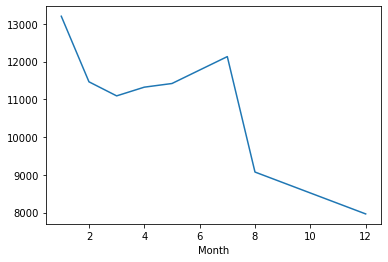

In [23]:
byMonth['twp'].plot()

 Now let's use seaborn's lmplot() to create a linear fit on the number of calls per month.

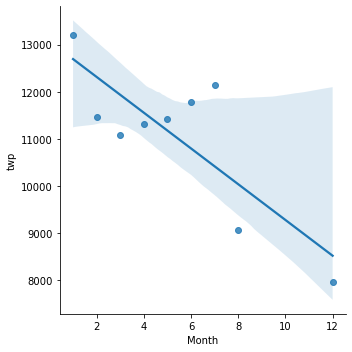

In [24]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Let's create a new column called 'Date' that contains the date from the timeStamp column.

In [25]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

Now we'll groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

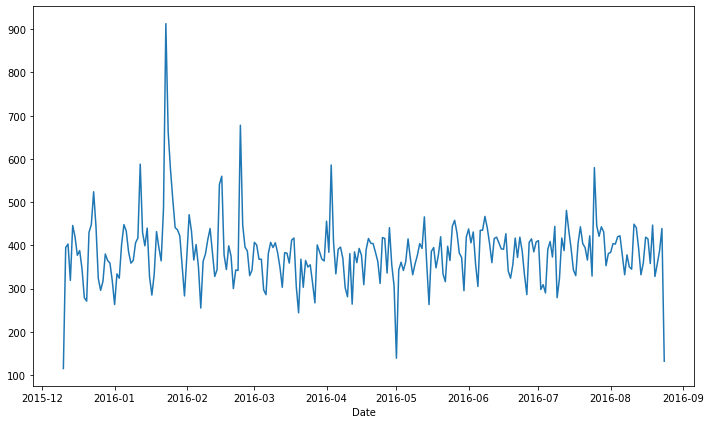

In [38]:
plt.figure(figsize=(10, 6))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

We can notice here there are some significant spikes in February and a little bit in March, and then we get some downturns in May and maybe late August.

Now let's recreate this plot but with 3 separate plots with each plot representing a Reason for the 911 call.

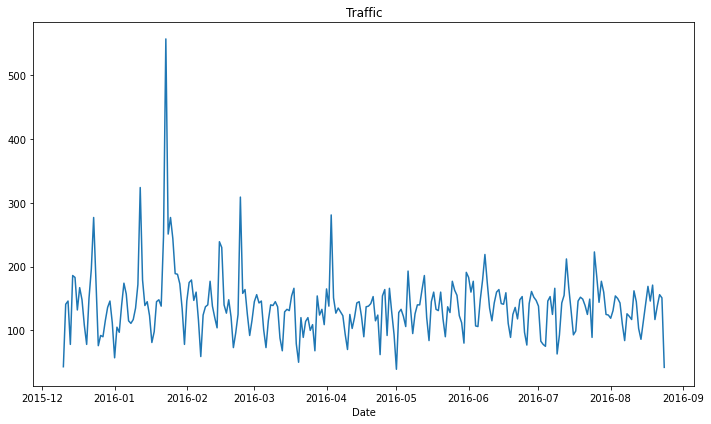

In [39]:
plt.figure(figsize=(10, 6))
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Text(0.5, 1.0, 'Fire')

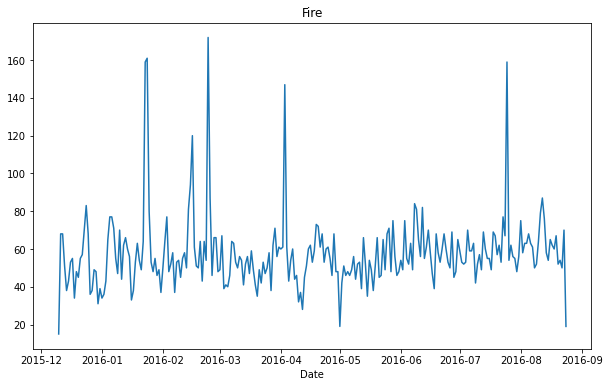

In [40]:
plt.figure(figsize=(10, 6))
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

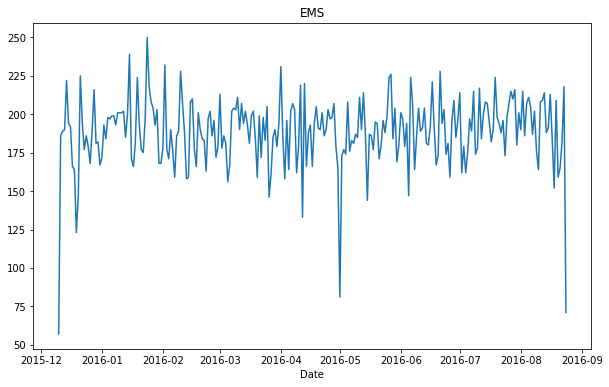

In [41]:
plt.figure(figsize=(10, 6))
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

____
Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [30]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Now we can create a HeatMap using this new DataFrame.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

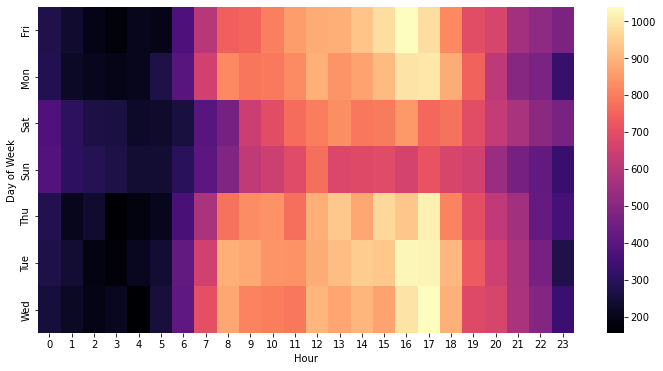

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='magma')

The calls tend to occurs during daytime. What's interesting is that not too many calls occurs on Sundays and Saturdays.

Now let's create a clustermap using this DataFrame.

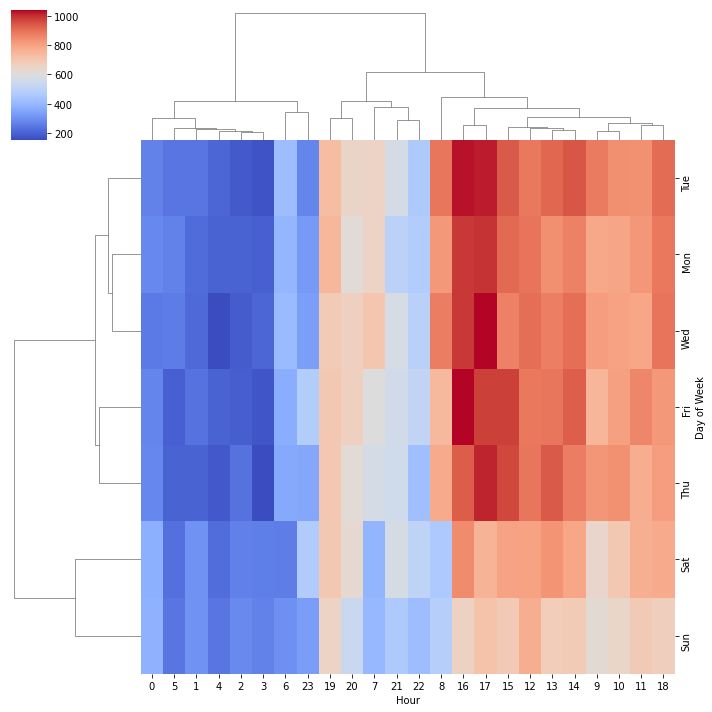

In [48]:
sns.clustermap(dayHour, cmap='coolwarm')

It look's like there are more calls during daytime Monday and Tuesday. Also we have plenty of calls in Thursday and Friday during the hours 8, 16 and 17.

We are going to repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [33]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Figure size 864x432 with 0 Axes>

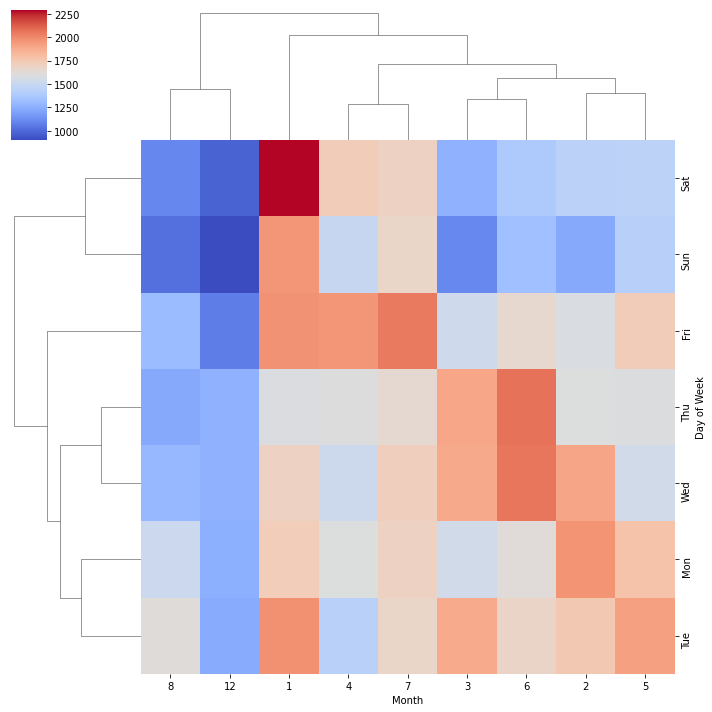

In [49]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth, cmap='coolwarm')

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

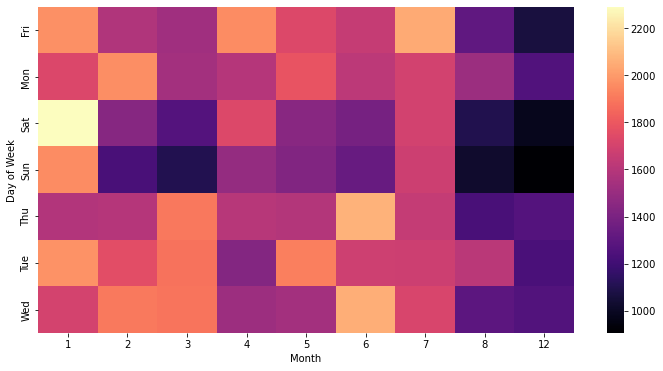

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='magma')